<a href="https://colab.research.google.com/github/filipzarazinski/AnomalyDetecion/blob/main/License_plates_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'wojcie' # username
os.environ['KAGGLE_KEY'] = '6e95d5d55ebf52f848d86b71d615e287' # key

!kaggle datasets download -d tolgadincer/us-license-plates

100% 2.83G/2.83G [02:31<00:00, 18.2MB/s]
100% 2.83G/2.83G [02:31<00:00, 20.0MB/s]


In [ ]:
!unzip us-license-plates

Archive:  us-license-plates.zip
  inflating: data/Alabama/0394ce43d60903.jpg  
  inflating: data/Alabama/0572e4b626974b.jpg  
  inflating: data/Alabama/0803e5959ef072.jpg  
  inflating: data/Alabama/085b6db539c717.jpg  
  inflating: data/Alabama/088072a40edaac.jpg  
  inflating: data/Alabama/0d16579f591cf8.jpg  
  inflating: data/Alabama/121bceec957e21.jpg  
  inflating: data/Alabama/16ac88bcf3d568.jpg  
  inflating: data/Alabama/16f46c3f65a5ad.jpg  
  inflating: data/Alabama/1c2e4495fdacf8.jpg  
  inflating: data/Alabama/24936846b06cc5.jpg  
  inflating: data/Alabama/263136c754b4b9.jpg  
  inflating: data/Alabama/26b61cc176a607.jpg  
  inflating: data/Alabama/2a0ab787956486.jpg  
  inflating: data/Alabama/2a887ffde8d8d8.jpg  
  inflating: data/Alabama/2b8499082fa577.jpg  
  inflating: data/Alabama/2dd689b865f992.jpg  
  inflating: data/Alabama/36e7eda4d54c3f.jpg  
  inflating: data/Alabama/3780bfd1cdd711.jpg  
  inflating: data/Alabama/3861b3a4e7999a.jpg  
  inflating: data/Alabama/39

In [ ]:
data_dir='data'

In [ ]:
len(os.listdir(data_dir))

51

In [ ]:
image_exts = ['jpg']

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4463 files belonging to 51 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([41, 19, 37, 30, 35, 21, 12, 23,  1,  2, 37, 36, 29,  9, 39, 50, 13,
       28, 44, 35, 41, 28, 35, 29, 12, 38, 40, 32, 36, 34, 18, 40],
      dtype=int32)

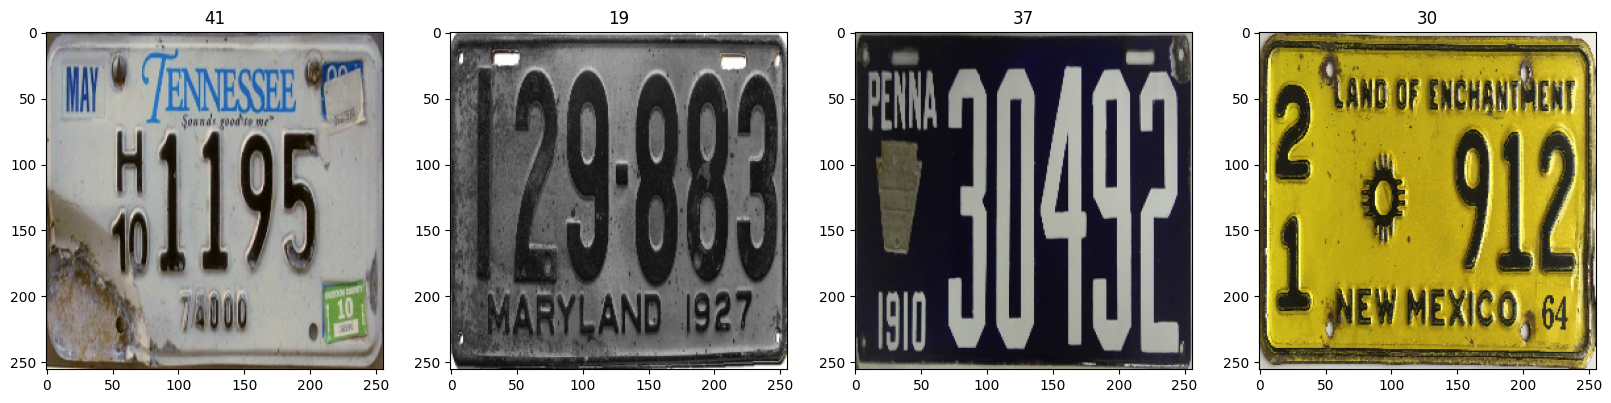

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].min()

0.0

split data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
test_size + val_size+train_size

140

In [ ]:
len(data)

140

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
#1warstwa, dodaje konwolucje z 16 filtrami o oknie 3x3 i przesuwa sie o 1 pixel

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(51, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
from keras.utils import to_categorical

def extract_labels_and_images(dataset):
    labels = []
    images = []
    for img, label in dataset:
        labels.append(label)
        images.append(img)
    return tf.concat(labels, axis=0), tf.concat(images, axis=0)

y_train, X_train = extract_labels_and_images(train)
y_val, X_val = extract_labels_and_images(val)
y_test, X_test = extract_labels_and_images(test)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=51)
y_val_encoded = to_categorical(y_val, num_classes=51)
y_test_encoded = to_categorical(y_test, num_classes=51)

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded), callbacks=[tensorboard_callback])

Epoch 1/20
98/98 [==============================] - 11s 52ms/step - loss: 3.6717 - accuracy: 0.1202 - val_loss: 3.1773 - val_accuracy: 0.2422
Epoch 2/20
98/98 [==============================] - 4s 42ms/step - loss: 2.3182 - accuracy: 0.4474 - val_loss: 2.1214 - val_accuracy: 0.5112
Epoch 3/20
98/98 [==============================] - 4s 41ms/step - loss: 0.8106 - accuracy: 0.7892 - val_loss: 2.1952 - val_accuracy: 0.5569
Epoch 4/20
98/98 [==============================] - 5s 48ms/step - loss: 0.2046 - accuracy: 0.9461 - val_loss: 2.6936 - val_accuracy: 0.5580
Epoch 5/20
98/98 [==============================] - 4s 43ms/step - loss: 0.0978 - accuracy: 0.9809 - val_loss: 3.0008 - val_accuracy: 0.5692
Epoch 6/20
98/98 [==============================] - 4s 40ms/step - loss: 0.0425 - accuracy: 0.9930 - val_loss: 3.0356 - val_accuracy: 0.5770
Epoch 7/20
98/98 [==============================] - 4s 41ms/step - loss: 0.0179 - accuracy: 0.9952 - val_loss: 3.1369 - val_accuracy: 0.5703
Epoch 8/20
9

Object `dziala` not found.


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
import cv2

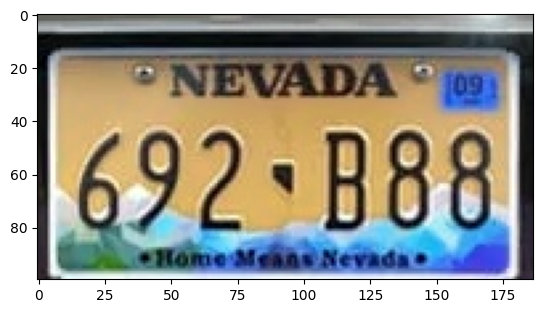

In [ ]:
img = cv2.imread('output_1.jpg')
plt.imshow(img)
plt.show()

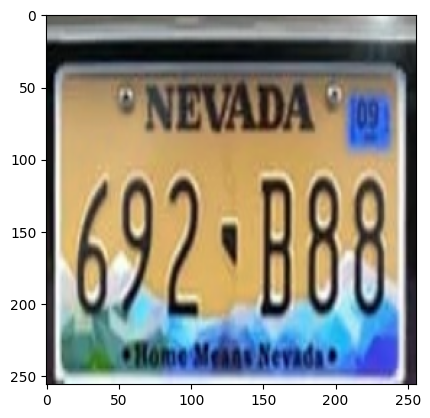

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 302ms/step


In [ ]:
yhat

array([[3.5859653e-08, 4.2949404e-09, 3.8919330e-09, 1.4398848e-09,
        9.9725997e-01, 1.0356485e-05, 8.2973323e-10, 2.1967688e-07,
        1.9963110e-10, 8.0534537e-14, 2.1806409e-10, 1.3782016e-10,
        9.3296443e-08, 5.8824522e-11, 4.8411783e-07, 1.9400374e-03,
        1.5560018e-13, 2.4559158e-05, 1.4885014e-13, 6.8295392e-09,
        5.4872541e-11, 5.1237864e-10, 4.9436721e-09, 6.6964127e-08,
        5.8272915e-09, 2.9179253e-10, 8.0101636e-06, 6.6782649e-11,
        2.1454474e-12, 5.6747923e-10, 2.7904488e-07, 4.1422263e-07,
        1.8540894e-09, 7.1332065e-11, 2.8659506e-06, 1.8477673e-08,
        6.2883072e-07, 3.8729661e-10, 4.5798060e-08, 5.2324381e-06,
        6.0214174e-05, 1.7733410e-06, 4.0153964e-04, 2.3998230e-09,
        2.3780523e-05, 3.7680109e-10, 2.5706217e-04, 1.5021556e-08,
        4.3570210e-09, 1.6223193e-08, 2.2932020e-06]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
yhat[0,4]

0.99726